<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Business Statistics</center></font></h1>
<h1><center>Common Statistical Tests - Week 3</center></h1>




<center><img src="https://cdn.pixabay.com/photo/2019/12/16/04/17/social-media-4698431__340.jpg" width="1000" height="600"></center>

<b><h2><center> Mobile Internet Case Study</center></h2></b>

## Problem Statement

### Business Context

With the availability of internet services on mobile devices, the way that people work, socialize, organize, and entertain themselves has radically changed. With access to entertainment channels, news, learning and research material, real-time video calling, and more, these multimedia communication devices have become an integral part of our day-to-day lives.


### Objective

A reputed research and consultation firm recently conducted a study on the increasing rate of internet usage over the past decade and reported that a typical American spends 144 minutes (2.4 hours) per day, on average, accessing the internet via a mobile device. You wish to test the validity of this statement. So, you reached out to friends and family to understand the time they spend per day accessing the internet via mobile devices. You received responses from 29 people and based on that, you want to check if there is enough evidence to suggest that the mean time spent per day accessing the internet via mobile devices is different from 144 minutes. A 5% significance level has been chosen.


### Data Dictionary

The results for the time spent per day accessing the Internet via a mobile device (in minutes) are stored in *InternetMobileTime.csv*.

## Import the necessary libraries



In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/Business Statistics/Common Statistical Tests/Week 3 Additional Case Study/InternetMobileTime.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [5]:
# looking at head (5 observations)
df.head()

,Minutes
0,72
1,144
2,48
3,72
4,36


* There is only one column `Minutes` in the sample which represents the time spent per day accessing the Internet via a mobile device (in minutes)

#### Checking the shape of the dataset

In [6]:
df.shape

(29, 1)

* The sample data contains 29 data points

#### Checking the data types of the columns for the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Minutes  29 non-null     int64
dtypes: int64(1)
memory usage: 360.0 bytes


* The mobile internet usage time is continuous in nature.

#### Statistical summary of the dataset

In [8]:
df.describe()

,Minutes
count,29.000000
mean,176.344828
std,142.185059
min,24.000000
25%,72.000000
50%,144.000000
75%,288.000000
max,576.000000


* From the sample, on an average, the mobile internet usage time by a person is 176.34 minutes per day.
* The median internet usage time (144 minutes) is less than the average, which suggests that the data is a little skewed to the right
* The minimum and maximum internet usage time from the sample data are 24 minutes and 576 minutes respectively. This shows that the usage time covers a wide range of values.

#### Visualize data

Sample mean = 176.3448275862069


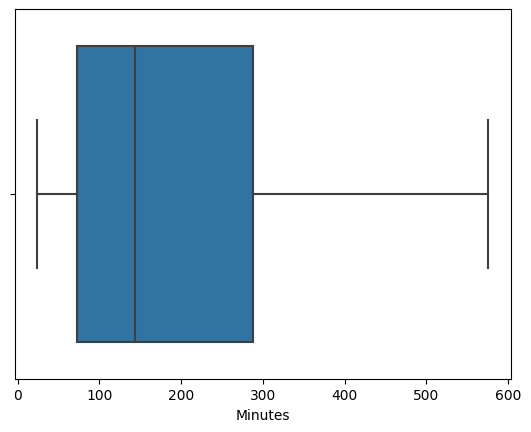

In [9]:
# Visual analysis of the distribution of the time spent by people in accessing the internet via a mobile device
sns.boxplot(x="Minutes", data = df)
print('Sample mean =',df['Minutes'].mean())
plt.show()

* The distribution of the mobile internet usage time is skewed to the right
* The sample mean is 176.34 minutes.
* Is the sample mean significantly different from the hypothesized population mean (144 minutes)? To determine this with significance, we will test the difference using a statistical test.

## Hypothesis Testing

### Step 1: Define null and alternative hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean mobile internet usage time by a typical American is equal to 144 minutes per day <br>
> $H_a:$ The mean mobile internet usage time by a typical American is not equal to 144 minutes per day

Let $\mu$ be the mean mobile internet usage time by a typical Americal per day

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu = 144 $ <br>
$H_a: \mu \neq 144 $

### Step 2: Select Appropriate test

This is a case of a two-tailed test for the significance of a single mean. As the population standard deviation is unknown, a one-sample t-test will be appropriate to test the formulate hypotheses.

**One sample t-test**

In a one sample t-test, we compare a sample mean with a hypothesized population mean to check if the sample mean differs significantly from the population mean.

We are provided that the sample is randomly selected and we assume that it has come from a normally distributed population.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Calculate the p-value

- We will use the `ttest_1samp()` function from the `scipy.stats` library to perform a one-sample t-test.
- The `ttest_1samp()` function takes the sample observations, hypothesized population mean and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test.
    - The sample observations are the values of internet usage time in the dataset.
    - The hypotheisized population mean, as provided in the problem statement and defined in the formulated hypotheses is 144
    - As it is a two-tailed test, we will set the argument `alternative = 'two-sided'`

In [10]:
# import the required function
from scipy.stats import ttest_1samp

# find the p-value
test_stat, p_value = ttest_1samp(df['Minutes'], popmean = 144, alternative = 'two-sided')
print('The p-value is', p_value)

The p-value is 0.23076657128249872


### Step 5: Compare the p-value with $\alpha$

In [11]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.23076657128249872 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6: Draw Inference

At a 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean mobile internet usage time by a typical Americal person is different from 144 minutes per day.

## Conclusions

* Based on the sample data, 50% of the people spend at least 144 minutes per day in accessing the internet via a mobile device


* Based on the sample data, the average mobile internet usage was found to be 176.34 minutes


* There wasn't enough statistical evidence to reject the research firm's claim about the average mobile internet usage time for a typical American


* The size of the sample can be increased to make the conclusion from the statistical test more reliable

---